In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Build a ML predictive model to predict whether customer will leave or continue using the banking service using the following bank data**

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df['Exited'].unique()

array([1, 0])

In [42]:
#drop the columns not required to build a ml model

df1 = df.drop(columns = ['RowNumber',	'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA - Exploratory Data Analysis**

* Univariate Analysis - Analysing one data column at a time
* Bivariate Analysis - Analysing two data column at a time and their effect on each other
* Multivariate Analysis - Analysing mutilple data column at a time and their effect on each other

**Univariate Analysis**

    * Categorical column
    * Continous column

In [43]:
#Categorical

print(df1['Geography'].unique())
print(df1['Gender'].unique())
print(df1['NumOfProducts'].unique())
print(df1['HasCrCard'].unique())
print(df1['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [44]:
#frequency of categorical values

print(df1['Geography'].value_counts())
print()
print(df1['Gender'].value_counts())
print()
print(df1['NumOfProducts'].value_counts())
print()
print(df1['HasCrCard'].value_counts())
print()
print(df1['IsActiveMember'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


<Axes: xlabel='Geography'>

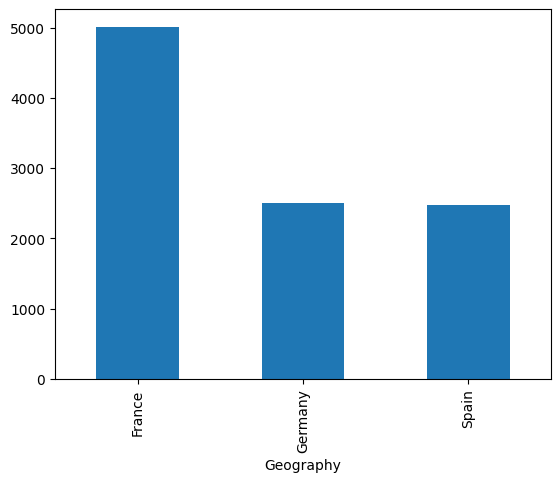

In [45]:
df1['Geography'].value_counts().plot.bar()

<Axes: ylabel='count'>

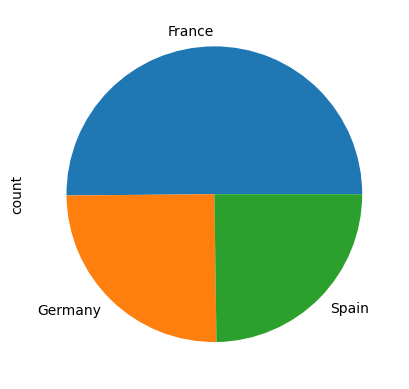

In [46]:
df1['Geography'].value_counts().plot.pie()

<Axes: xlabel='Gender'>

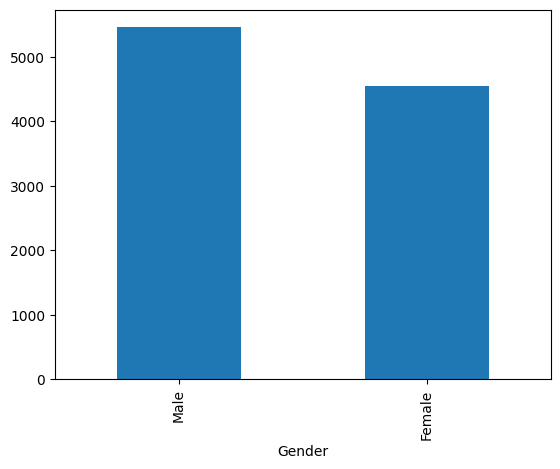

In [47]:
df1['Gender'].value_counts().plot.bar()

<Axes: xlabel='NumOfProducts'>

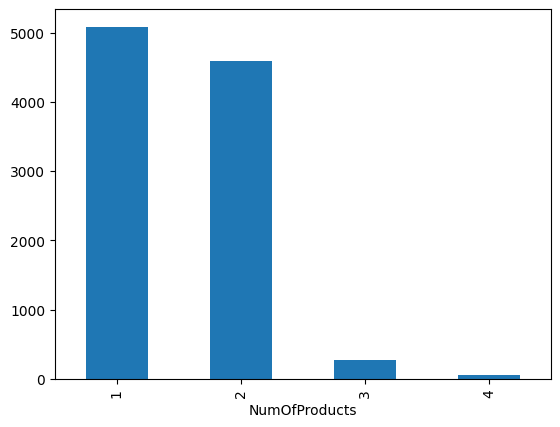

In [48]:
df1['NumOfProducts'].value_counts().plot.bar()

<Axes: xlabel='HasCrCard'>

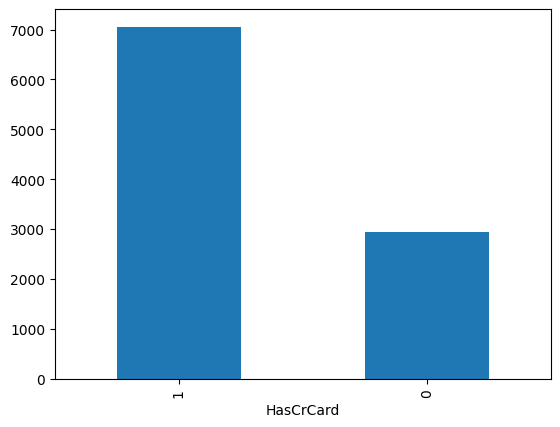

In [49]:
df1['HasCrCard'].value_counts().plot.bar()

<Axes: xlabel='IsActiveMember'>

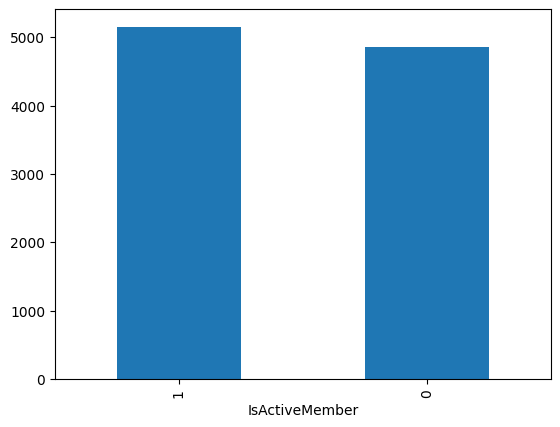

In [50]:
df1['IsActiveMember'].value_counts().plot.bar()

**NumOfProduct column**

    * it has approx 50% samples representing category 1
    * approx 45% samples with category 2
    * rest 5% is category 3 & 4
    * as for category 3 & 4 we have very less samples in comparasion to 1 & 2
    * we can combine 2,3 & 4 to handle biasness

In [51]:
#user define function to combine 2,3 & 4

def combine_numofproducts(value):
    if value == 1:
        return value
    else:
        return 2

In [52]:
combine_numofproducts(1)

1

In [53]:
df1['NumOfProducts'] = df1['NumOfProducts'].apply(combine_numofproducts)

<Axes: xlabel='NumOfProducts'>

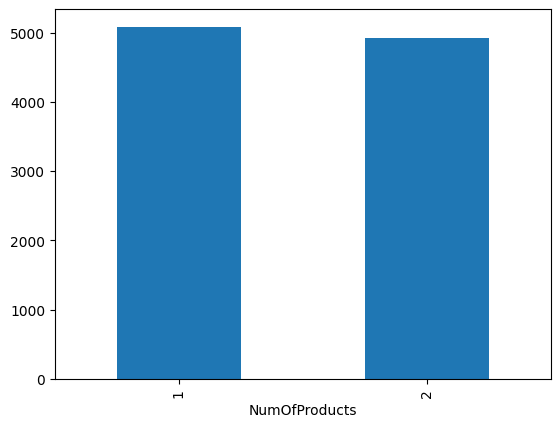

In [54]:
df1['NumOfProducts'].value_counts().plot.bar()

**Univariate Analysis on Continous columns**

In [55]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [56]:
print('Credit Score')
print(df1['CreditScore'].mean())
print(df1['CreditScore'].min())
print(df1['CreditScore'].max())
print()
print('Age')
print(df1['Age'].mean())
print(df1['Age'].min())
print(df1['Age'].max())
print()
print('Balance')
print(df1['Balance'].mean())
print(df1['Balance'].min())
print(df1['Balance'].max())
print()

Credit Score
650.5288
350
850

Age
38.9218
18
92

Balance
76485.889288
0.0
250898.09



**Histogram plot for continous values**

<Axes: ylabel='Frequency'>

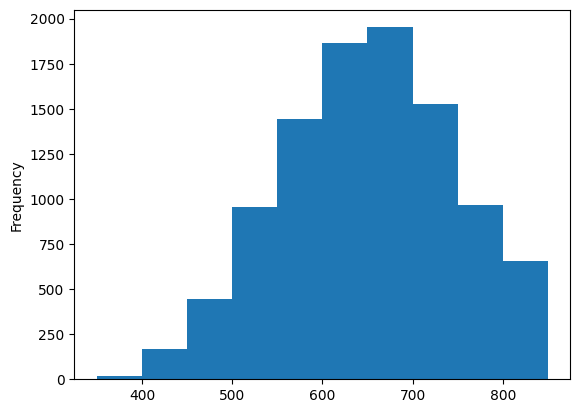

In [57]:
df1['CreditScore'].plot.hist()

<Axes: ylabel='Frequency'>

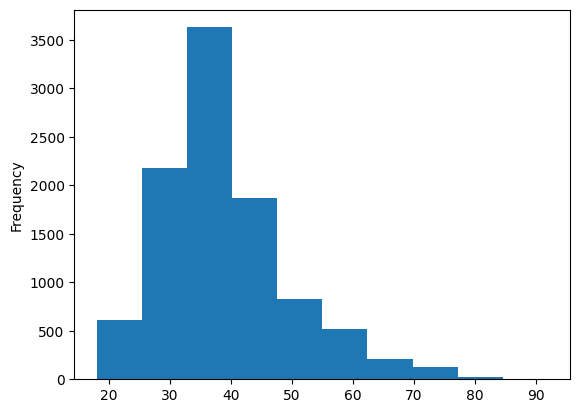

In [58]:
df1['Age'].plot.hist()

<Axes: ylabel='Frequency'>

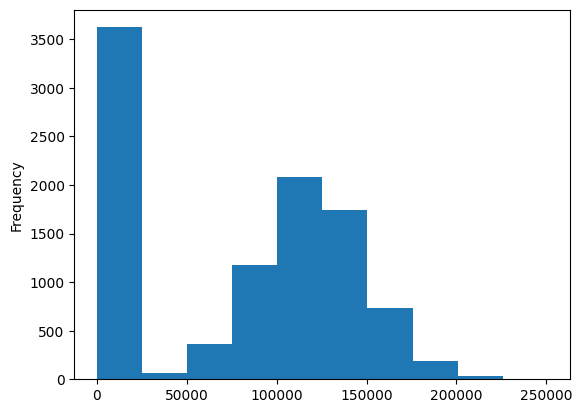

In [59]:
df1['Balance'].plot.hist()

<Axes: ylabel='Frequency'>

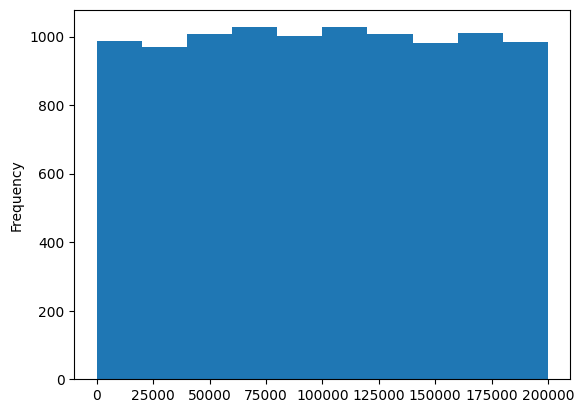

In [60]:
df1['EstimatedSalary'].plot.hist()

**Bivariate Analysis**

    * categorical & categorical
    * categorical & continous
    * continous & continous

In [61]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,2,1,0,113931.57,1


In [62]:
#categorical vs categorical

pd.crosstab(df1['Geography'] , df1['Gender'])

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


<Axes: xlabel='Geography'>

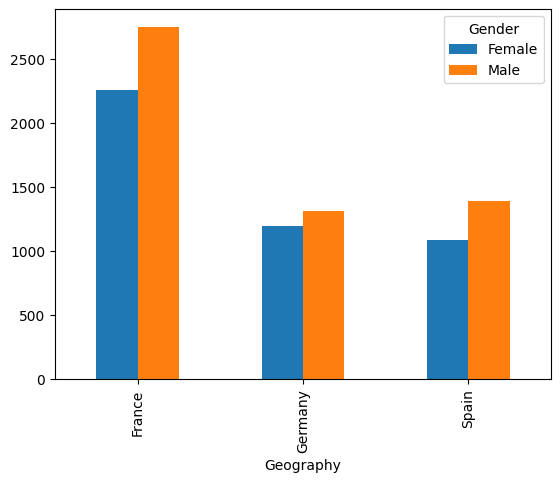

In [63]:
pd.crosstab(df1['Geography'] , df1['Gender']).plot.bar()

In [64]:
#Exit of customers from each country
pd.crosstab(df1['Geography'], df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

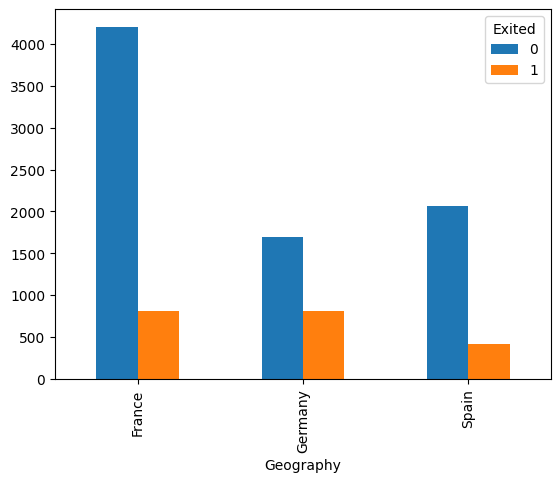

In [65]:
pd.crosstab(df1['Geography'], df1['Exited']).plot.bar()

<Axes: xlabel='Gender'>

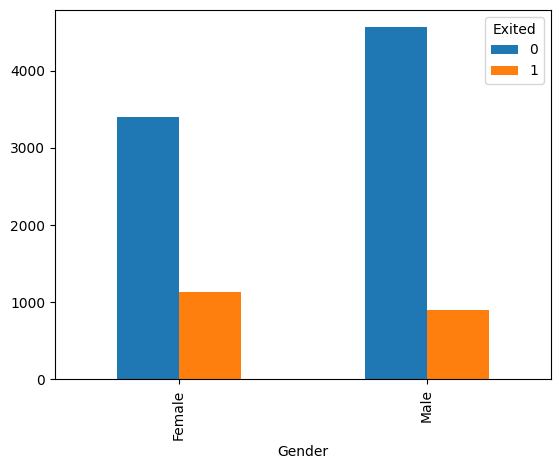

In [66]:
#Exit of customer as 'Male' and 'Female'
pd.crosstab(df1['Gender'], df1['Exited']).plot.bar()

<Axes: xlabel='NumOfProducts'>

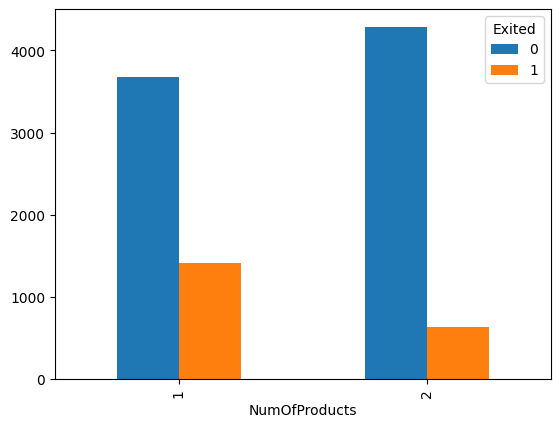

In [67]:
#Exit of Customer as numofproducts 1 and 2
pd.crosstab(df1['NumOfProducts'], df1['Exited']).plot.bar()

<Axes: xlabel='HasCrCard'>

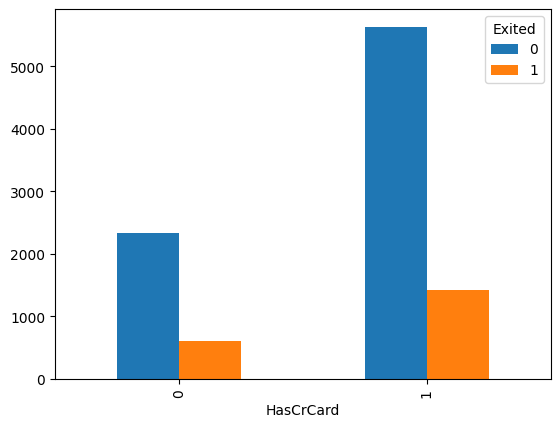

In [69]:
#Exit of customers as "Has cr card = 1" and "Has cr card = 0"
pd.crosstab(df1['HasCrCard'], df1['Exited']).plot.bar()

In [ ]:
#Categorical & Continous

In [ ]:
#Continous & Continous